<h1 id="tocheading">Sample Notebook for Analysis <Title></h1> <br>
<strong>Table of Contents<strong>
<div id="toc"></div>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://snsdigitaldevs.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
#re-imports modules that have changed
%load_ext autoreload
%autoreload 2

# Dependencies

In [3]:
import sys
sys.path.append("../")

In [4]:
#standard
import os
import pprint
from collections import Counter
import datetime as dt
import random
import math

#packages
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.stats import ttest_ind_from_stats

#logic
from src.utils import output_to_csv, getNumber, hasNumbers 
import src.settings as settings

In [5]:
#set options
pd.set_option("display.max_rows", 3500)
pd.set_option("display.max_columns", 500)
pd.set_option('max_colwidth',400)
pd.options.display.float_format = '{:.3f}'.format

# Constants

In [6]:
#Set constants such as api keys, project settings or date here
today = settings.TODAY
source_credit = settings.PREPEND_OBJ #for csv output
print(source_credit)

Project:, Ad-hoc Reporting 
Last updated:, 2019-10-13 
By:, Kas Stohr 
Contact:, kas.stohr@simonandschuster.com 
Code repository:, https://github.com/orgs/snsdigitaldevs/teams/tiller


# Functions

In [7]:
def convert_str_float(series):
    new_list = []
    for x in series: 
        if not hasNumbers(x): 
            x = 0 
        else: 
            x = float(x)
        new_list.append(x)
    return new_list

# Load data

## Goodreads sample data

In [8]:
#Load data by dataset.
#Use markdown to track datasets used in a notebook. 
#In cases with multiple datasets, each of which need to be processed
#processing can be included here by dataset
filepath = '../data/goodreads/books.csv'
#skip prepended meta data rows. 
data = pd.read_csv(filepath, skiprows=1)

# Process Data

In [9]:
data.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry Potter #1),J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390


In [10]:
data.columns = data.columns.str.strip('# ')
books = data.copy()

In [11]:
books.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
dtype: object

In [12]:
#remove txt strings from ratings
books['average_rating'] = convert_str_float(books['average_rating'])
books['average_rating'] = books['average_rating'].astype(float)

In [13]:
#remove txt strings from num_pages
books['num_pages'] = convert_str_float(books['num_pages'])
books['num_pages'] = books['num_pages'].astype(int)

In [14]:
books.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling-Mary GrandPré,4.560,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling-Mary GrandPré,4.490,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry Potter #1),J.K. Rowling-Mary GrandPré,4.470,439554934,9780439554930,eng,320,5629932,70390


# Analysis

## Averge Rating by Number of Pages

Is there a correlation between the length of a book in terms of number of pages and the average rating? 

In [15]:
books[0:100].plot(y='num_pages', x='average_rating', kind='scatter')

## Rating Count by Number of Pages

Is there a correlation between the length of a book in terms of number of pages and the number of ratings?

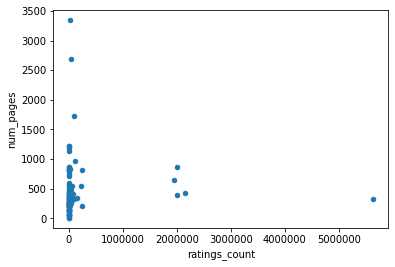

In [16]:
books[0:100].plot(y='num_pages', x='ratings_count', kind='scatter')

# Output


In [17]:
#outputs analysis dataset with pre-pended date and sourcing information
source_credit = source_credit + "\nPurpose:, Sample Output File. Delete from repo."
output_to_csv(books, 'book_analysis', date=False, include_index=False, source_credit=source_credit)

../output/tiller_book_analysis.csv


In [18]:
# End sample notebook